In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
%%time
df=pd.read_csv("train.csv",nrows=4000000,dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32',
 'HasDetections': 'int32'})

Wall time: 2min 6s


In [3]:
initial_memory=df.memory_usage().sum()

In [4]:
df.shape

(4000000, 83)

In [5]:
for col in df.columns:
    #print("Number of Unique values : "+str(col)+" :"+str(df[col].dtype),df[col].nunique())
    if df[col].nunique()==2:
        try:
            df[col]=df[col].astype('int8')
        except:
            continue
    else:
        continue

In [6]:
print("Number of Columns : ",len(df.columns))
print("Number of Rows : ",len(df))
print("Memory Usage : ",df.memory_usage().sum())

Number of Columns :  83
Number of Rows :  4000000
Memory Usage :  856229408


In [7]:
l=df.columns[df.isnull().any()].tolist()

In [8]:
drop_list=[]
delete_rows_list=[]
treat_list=[]
for column in l:
    #print("Number of Null Values for : "+str(column)+" "+str(df[column].isnull().sum())+" "+str(df[column].isnull().sum()*100/len(df))+"%")
    if df[column].isnull().sum()*100/len(df)>=60:#dropping columns with more than 30% of missing values
        drop_list.append(column)
    elif df[column].isnull().sum()*100/len(df)<=30:#Deleting rows having columns upto 30% missing values
        delete_rows_list.append(column)
    else:#Treating null values in the remainder of the columns
        treat_list.append(column)

In [9]:
drop_list

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [10]:
delete_rows_list

['RtpStateBitfield',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CityIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSInstallLanguageIdentifier',
 'Census_IsFlightsDisabled',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedC

In [11]:
treat_list

['OrganizationIdentifier', 'SmartScreen']

In [12]:
df.drop(columns=drop_list,axis=1,inplace=True)

In [13]:
df.shape

(4000000, 76)

In [14]:
df.dropna(subset=delete_rows_list,axis=0,inplace=True)

In [15]:
import statistics

In [16]:
column_value_replacements={}
#number_of_unique={}
#equal_col=[]
for col in df.columns:
    if col=='MachineIdentifier':
        continue
    elif col in df.select_dtypes(include=['category','object']).columns:
        column_value_replacements[col]=statistics.mode(df[col])
#        number_of_unique[col]=df[col].nunique()
    else:
        column_value_replacements[col]=np.nanmedian(df[col])

In [17]:
df.shape

(3219314, 76)

In [18]:
df.OrganizationIdentifier.isnull().sum()

991610

C:\Users\gandh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\gandh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


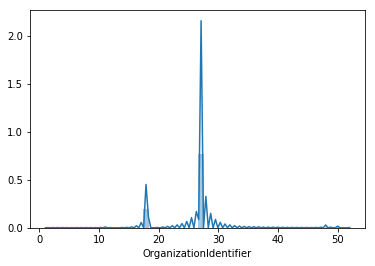

In [19]:
sns.distplot(df.OrganizationIdentifier.fillna(np.nanmedian(df['OrganizationIdentifier'])))

In [20]:
df.SmartScreen.isnull().sum()

1100886

In [21]:
statistics.mode(df.SmartScreen)

'RequireAdmin'

In [22]:
df.SmartScreen.fillna(statistics.mode(df.SmartScreen),inplace=True)

In [23]:
df.OrganizationIdentifier.fillna(np.nanmedian(df.OrganizationIdentifier),inplace=True)

In [24]:
df.shape

(3219314, 76)

In [25]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [26]:
#for col in df.columns:
#    print("Number of unique values for : "+str(col)+" :",df[col].nunique())

In [27]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [28]:
df.select_dtypes(include='int64').columns

Index([], dtype='object')

In [29]:
df.select_dtypes(include='float64').columns

Index([], dtype='object')

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cols=df.columns.tolist()

In [32]:
df[cols[1]].nunique()

4

In [33]:
df[cols[1]].unique()

[win8defender, mse, mseprerelease, scep]
Categories (4, object): [win8defender, mse, mseprerelease, scep]

In [34]:
df[cols[1]].value_counts()

win8defender     3217239
mse                 2073
scep                   1
mseprerelease          1
fep                    0
windowsintune          0
Name: ProductName, dtype: int64

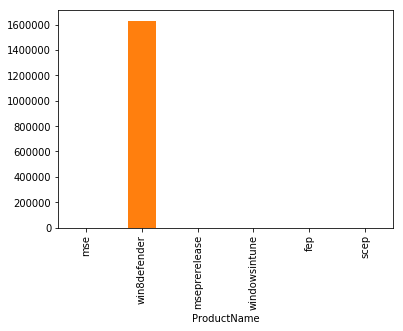

In [35]:
fig,ax=plt.subplots()
df[df.HasDetections==1].groupby(cols[1]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [36]:
df[df.HasDetections==1].groupby(cols[1]).count()['MachineIdentifier']

ProductName
mse                  706
win8defender     1631001
mseprerelease          0
windowsintune          0
fep                    0
scep                   0
Name: MachineIdentifier, dtype: int64

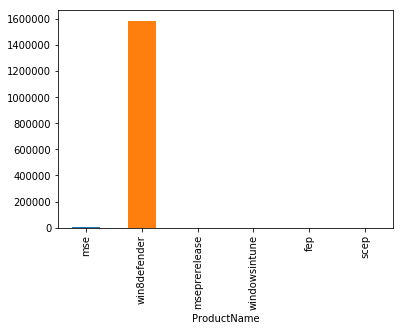

In [37]:
fig,ax=plt.subplots()
df[df.HasDetections==0].groupby(cols[1]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [38]:
df[df.HasDetections==0].groupby(cols[1]).count()['MachineIdentifier']

ProductName
mse                 1367
win8defender     1586238
mseprerelease          1
windowsintune          0
fep                    0
scep                   1
Name: MachineIdentifier, dtype: int64

In [39]:
df.drop(columns=cols[1],axis=1,inplace=True)

In [40]:
df[cols[2]].nunique()

58

In [41]:
df[cols[2]].unique()

[1.1.15100.1, 1.1.14600.4, 1.1.15200.1, 1.1.15300.6, 1.1.14800.3, ..., 1.1.11903.0, 1.1.11701.0, 1.1.12002.0, 1.1.12101.0, 1.1.12706.0]
Length: 58
Categories (58, object): [1.1.15100.1, 1.1.14600.4, 1.1.15200.1, 1.1.15300.6, ..., 1.1.11701.0, 1.1.12002.0, 1.1.12101.0, 1.1.12706.0]

In [42]:
cols[2]

'EngineVersion'

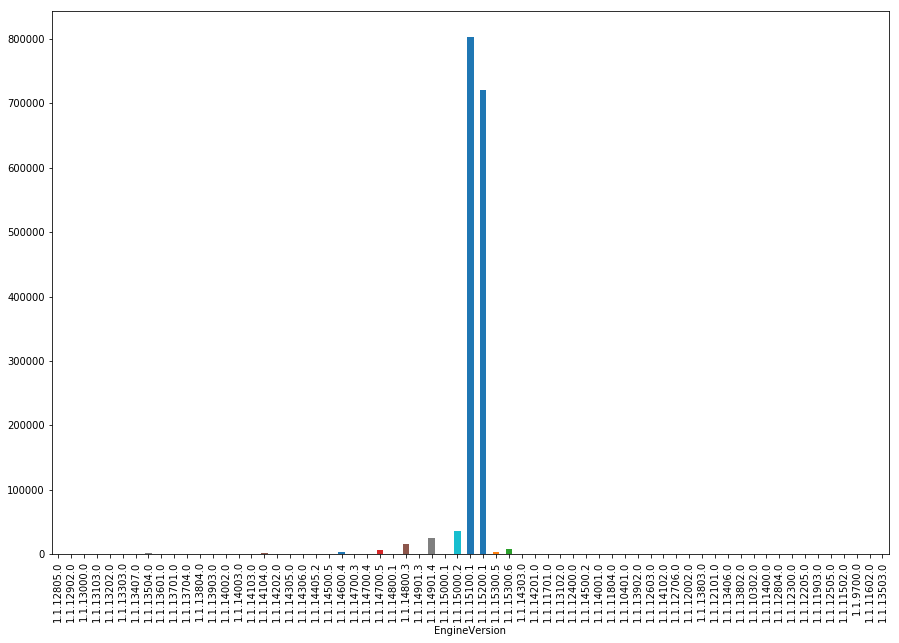

In [43]:
fig,ax=plt.subplots(figsize=(15,10))
df[df.HasDetections==1].groupby(cols[2]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [44]:
t1=df[df.HasDetections==1].groupby(cols[2]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

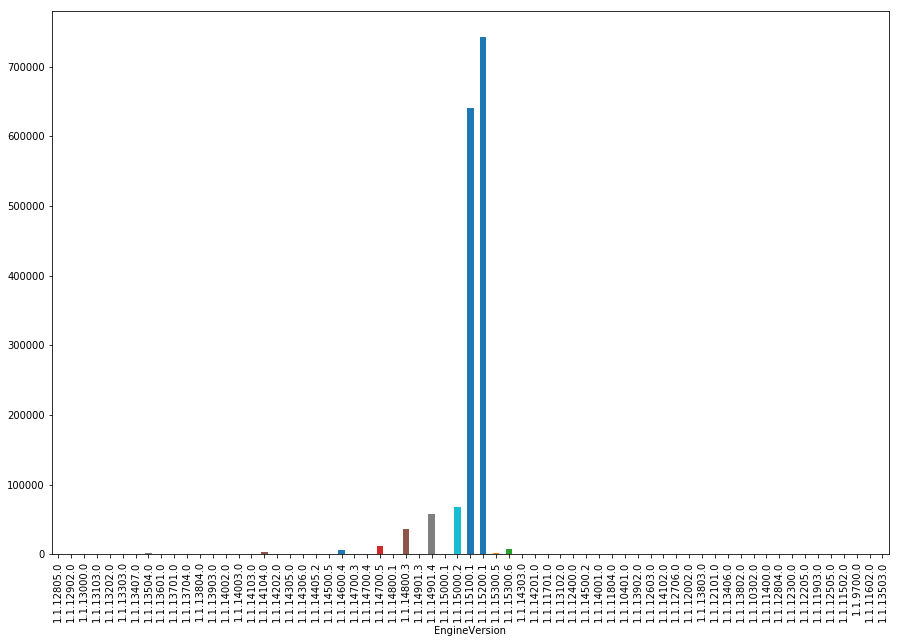

In [45]:
fig,ax=plt.subplots(figsize=(15,10))
df[df.HasDetections==0].groupby(cols[2]).count()['MachineIdentifier'].plot(kind='bar',ax=ax)

In [46]:
t2=df[df.HasDetections==0].groupby(cols[2]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

In [47]:
t1.rename(columns={'MachineIdentifier':'NOM_affected_EngineVersion'},inplace=True)
t2.rename(columns={'MachineIdentifier':'NOM_unaffected_EngineVersion'},inplace=True)
t=t1.merge(t2,on='EngineVersion',how='inner')

In [48]:
t['EngineVersion_Percent_Affected']=np.round(t['NOM_affected_EngineVersion']*100/(t['NOM_affected_EngineVersion']+t['NOM_unaffected_EngineVersion']))

In [49]:
t.drop(columns=['NOM_affected_EngineVersion','NOM_unaffected_EngineVersion'],inplace=True)

In [50]:
t.sort_values(by='EngineVersion_Percent_Affected',ascending=False,inplace=True)

Text(0,0.5,'Percentage of Affected Machines')

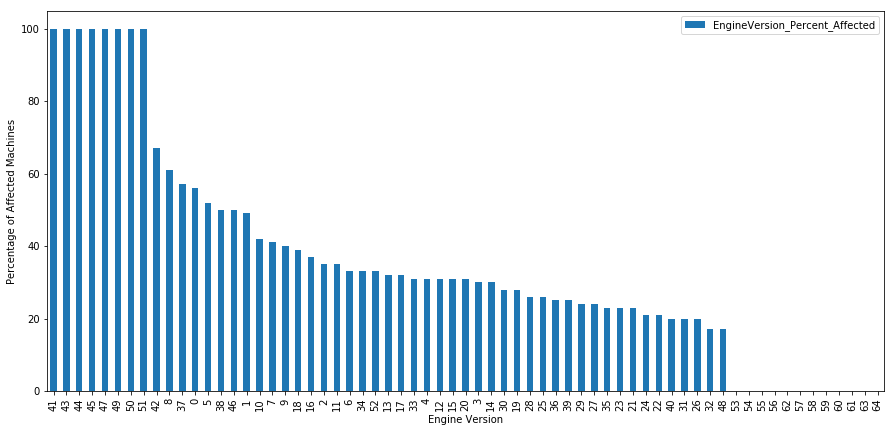

In [51]:
fig,ax=plt.subplots(figsize=(15,7))
t.plot(kind='bar',ax=ax)
ax.set_xlabel("Engine Version")
ax.set_ylabel("Percentage of Affected Machines")

In [52]:
df[cols[3]].nunique()

99

In [53]:
df[cols[3]].unique()

[4.18.1807.18075, 4.13.17134.1, 4.18.1806.18062, 4.12.16299.15, 4.14.17639.18041, ..., 4.8.10240.17446, 4.13.17627.1000, 4.11.15063.1154, 4.8.10240.16425, 4.13.17634.1000]
Length: 99
Categories (99, object): [4.18.1807.18075, 4.13.17134.1, 4.18.1806.18062, 4.12.16299.15, ..., 4.13.17627.1000, 4.11.15063.1154, 4.8.10240.16425, 4.13.17634.1000]

In [54]:
df[cols[3]].value_counts()

4.18.1807.18075     2031647
4.18.1806.18062      344396
4.16.17656.18052      96838
4.12.16299.15         96462
4.14.17639.18041      79083
4.8.10240.17443       77073
4.9.10586.1106        74403
4.13.17134.228        66123
4.13.17134.1          65529
4.10.209.0            42760
4.12.17007.18022      39429
4.14.17613.18039      21593
4.11.15063.447        19049
4.9.10586.0           18483
4.12.17007.18011      17232
4.8.10240.16384       16225
4.11.15063.0          14506
4.10.14393.0          13087
4.10.14393.1794       11355
4.11.15063.1155        9350
4.9.10586.672          6847
4.13.17134.191         6484
4.10.14393.1198        5547
4.9.10586.494          3922
4.12.17007.17123       3777
4.9.10586.1045         3501
4.13.17134.112         3376
4.10.14393.1613        3337
4.9.10586.589          3219
4.10.14393.1593        2294
                     ...   
4.11.15063.994           21
4.17.17682.1000          15
4.10.14393.2457          14
4.15.17666.1000          13
4.15.17661.1001     

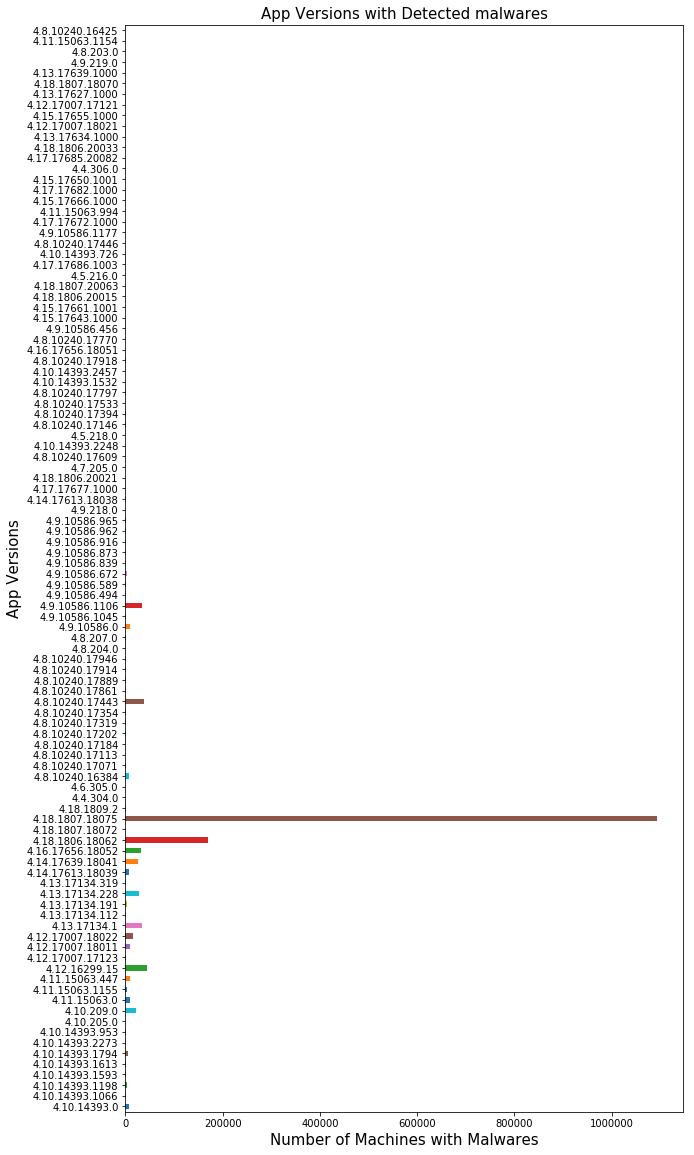

In [55]:
fig,ax=plt.subplots(figsize=(10,20))
df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
ax.set_title("App Versions with Detected malwares",fontsize=15)
ax.set_xlabel("Number of Machines with Malwares",fontsize=15)
ax.set_ylabel("App Versions",fontsize=15)
fig.savefig(str(cols[3])+"_HasDetections_1"+".jpg")

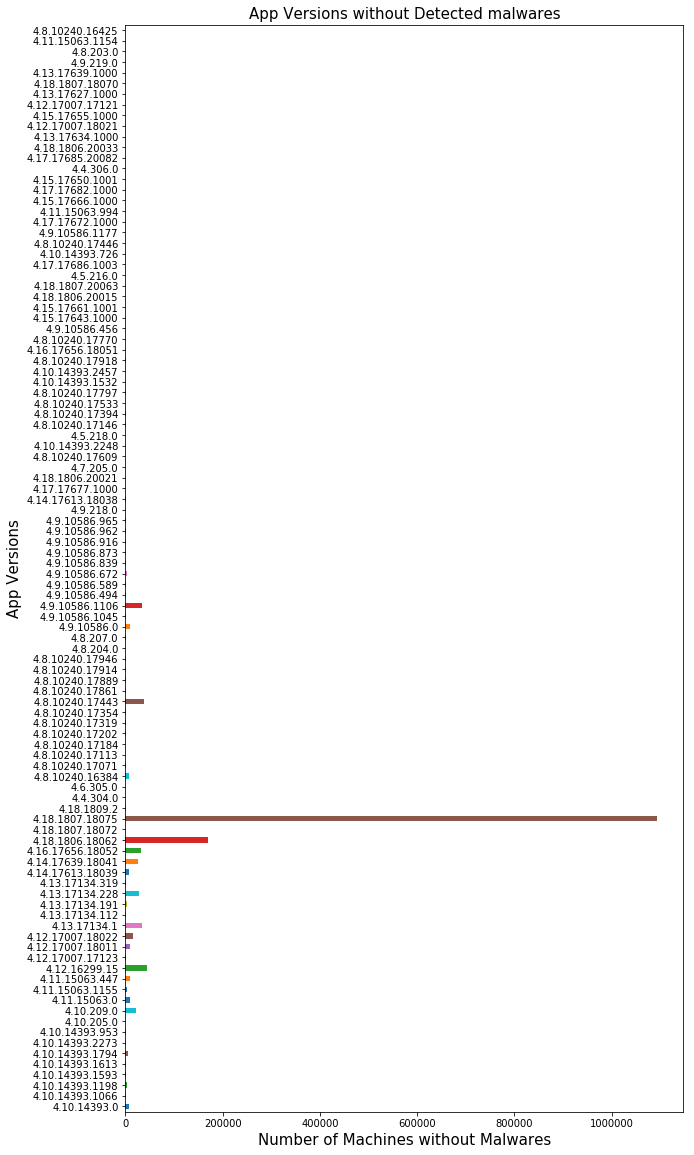

In [56]:
fig,ax=plt.subplots(figsize=(10,20))
df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
ax.set_title("App Versions without Detected malwares",fontsize=15)
ax.set_xlabel("Number of Machines without Malwares",fontsize=15)
ax.set_ylabel("App Versions",fontsize=15)
fig.savefig(str(cols[3])+"_HasDetections_0"+".jpg")

In [57]:
u1=df[df.HasDetections==1].groupby(cols[3]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)
u2=df[df.HasDetections==0].groupby(cols[3]).count()['MachineIdentifier'].reset_index().sort_values(by='MachineIdentifier',ascending=False)

In [58]:
u1.rename(columns={'MachineIdentifier':'NOM_affected_AppVersion'},inplace=True)
u2.rename(columns={'MachineIdentifier':'NOM_unaffected_AppVersion'},inplace=True)
u=u1.merge(u2,on='AppVersion',how='outer')

In [59]:
u['AppVersion_Percent_Affected']=np.round(u['NOM_affected_AppVersion']*100/(u['NOM_affected_AppVersion']+u['NOM_unaffected_AppVersion']))

In [60]:
u.drop(columns=['NOM_affected_AppVersion','NOM_unaffected_AppVersion'],inplace=True)

In [61]:
u.sort_values(by='AppVersion_Percent_Affected',ascending=False,inplace=True)

In [62]:
cols[5]

'IsBeta'

In [63]:
df[cols[5]].nunique()

2

In [64]:
df[cols[5]].unique()

array([0, 1], dtype=int64)

In [65]:
df[cols[5]].value_counts()

0    3219309
1          5
Name: IsBeta, dtype: int64

In [66]:
df.drop(columns=['IsBeta'],axis=1,inplace=True)

In [67]:
df[cols[6]].nunique()

7

In [68]:
df[cols[6]].unique()

array([ 7.,  0.,  3.,  5.,  8.,  1., 35.])

In [69]:
df[cols[6]].value_counts()

7.0     3133588
0.0       69723
5.0        7722
8.0        6831
3.0         888
1.0         554
35.0          8
Name: RtpStateBitfield, dtype: int64

In [70]:
cols[6]

'RtpStateBitfield'

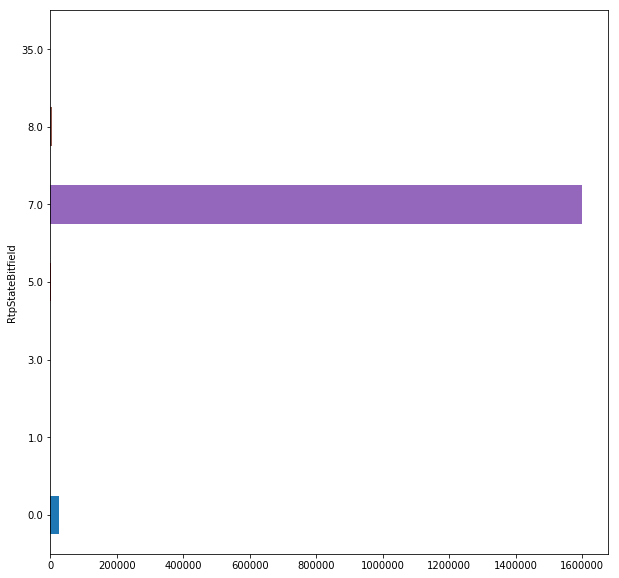

In [71]:
fig,ax=plt.subplots(figsize=(10,10))
df[df.HasDetections==1].groupby(cols[6]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)
#df[df.HasDetections==0].groupby(cols[6]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)

In [72]:
#fig,ax=plt.subplots(figsize=(10,10))
df[df.HasDetections==1].groupby(cols[6]).count()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
RtpStateBitfield,,,,,,,,,,,,,,,,,,,,,
0.0,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852,...,25852,25852,25852,25852,25852,25852,25852,25852,25852,25852
1.0,220,220,220,220,220,220,220,220,220,220,...,220,220,220,220,220,220,220,220,220,220
3.0,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252
5.0,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177,...,1177,1177,1177,1177,1177,1177,1177,1177,1177,1177
7.0,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978,...,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978,1598978
8.0,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220,...,5220,5220,5220,5220,5220,5220,5220,5220,5220,5220
35.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [73]:
df[df.HasDetections==0].groupby(cols[6]).count()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
RtpStateBitfield,,,,,,,,,,,,,,,,,,,,,
0.0,43871,43871,43871,43871,43871,43871,43871,43871,43871,43871,...,43871,43871,43871,43871,43871,43871,43871,43871,43871,43871
1.0,334,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
3.0,636,636,636,636,636,636,636,636,636,636,...,636,636,636,636,636,636,636,636,636,636
5.0,6545,6545,6545,6545,6545,6545,6545,6545,6545,6545,...,6545,6545,6545,6545,6545,6545,6545,6545,6545,6545
7.0,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610,...,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610,1534610
8.0,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611


In [74]:
df[cols[7]].unique()

array([0, 1], dtype=int64)

In [75]:
df[cols[7]].value_counts()

0    3160850
1      58464
Name: IsSxsPassiveMode, dtype: int64

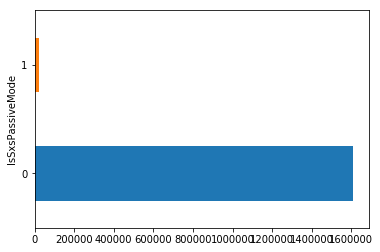

In [76]:
fig,ax=plt.subplots()
df[df.HasDetections==1].groupby(cols[7]).count()['MachineIdentifier'].plot(kind='barh',ax=ax)

In [77]:
#fig,ax=plt.subplots()
df[df.HasDetections==0].groupby(cols[7]).count()['MachineIdentifier']#.plot(kind='barh',ax=ax)

IsSxsPassiveMode
0    1550457
1      37150
Name: MachineIdentifier, dtype: int64

In [78]:
df[df.HasDetections==1].groupby(cols[7]).count()['MachineIdentifier']

IsSxsPassiveMode
0    1610393
1      21314
Name: MachineIdentifier, dtype: int64

In [79]:
df[cols[8]].nunique()

14632

In [80]:
df[cols[8]].unique()

array([53447., 43927., 47238., ..., 42438.,  4510.,  3689.])

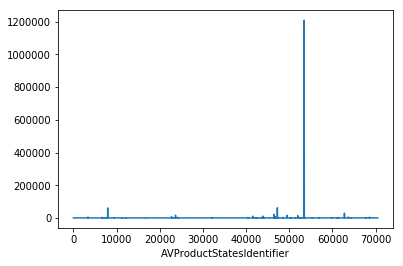

In [81]:
df[df.HasDetections==1].sort_values(by=cols[8]).groupby(cols[8]).count()['MachineIdentifier'].plot()

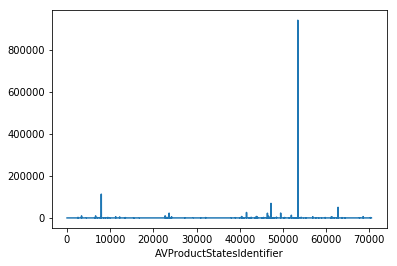

In [82]:
df[df.HasDetections==0].sort_values(by=cols[8]).groupby(cols[8]).count()['MachineIdentifier'].plot()

In [83]:
cols[9]

'AVProductsInstalled'

In [84]:
df[cols[9]].nunique()

6

In [85]:
df[cols[9]].unique()

array([1., 2., 3., 5., 4., 6.])

In [86]:
df[cols[9]].value_counts()

1.0    2240680
2.0     900504
3.0      75011
4.0       2952
5.0        160
6.0          7
Name: AVProductsInstalled, dtype: int64

In [87]:
df[df.HasDetections==1].groupby(cols[9]).count()['MachineIdentifier']

AVProductsInstalled
1.0    1246147
2.0     362378
3.0      22352
4.0        783
5.0         47
Name: MachineIdentifier, dtype: int64

In [88]:
df[df.HasDetections==0].groupby(cols[9]).count()['MachineIdentifier']

AVProductsInstalled
1.0    994533
2.0    538126
3.0     52659
4.0      2169
5.0       113
6.0         7
Name: MachineIdentifier, dtype: int64

In [89]:
cols[10]

'AVProductsEnabled'

In [90]:
df[cols[10]].unique()

array([1., 0., 2., 4., 3., 5.])

In [91]:
df[cols[10]].value_counts()

1.0    3148037
2.0      61799
0.0       7564
3.0       1767
4.0        141
5.0          6
Name: AVProductsEnabled, dtype: int64

In [92]:
df[df.HasDetections==1][cols[10]].value_counts()

1.0    1608510
2.0      20092
0.0       2519
3.0        539
4.0         47
Name: AVProductsEnabled, dtype: int64

In [93]:
df[df.HasDetections==0][cols[10]].value_counts()

1.0    1539527
2.0      41707
0.0       5045
3.0       1228
4.0         94
5.0          6
Name: AVProductsEnabled, dtype: int64

In [94]:
cols[11]

'HasTpm'

In [95]:
df[cols[11]].unique()

array([1, 0], dtype=int64)

In [96]:
df[cols[11]].value_counts()

1    3214456
0       4858
Name: HasTpm, dtype: int64

In [97]:
df[df.HasDetections==1][cols[11]].value_counts()

1    1629709
0       1998
Name: HasTpm, dtype: int64

In [98]:
df[df.HasDetections==0][cols[11]].value_counts()

1    1584747
0       2860
Name: HasTpm, dtype: int64

In [99]:
cols[12]

'CountryIdentifier'

In [100]:
df[cols[12]].nunique()

222

In [101]:
df[cols[12]].unique()

array([ 29,  93,  86,  88,  18,  97,  78, 164, 107,  80, 171, 169, 157,
       158, 147,  12, 203,  43, 205, 199,   9,  68, 141,  35, 159, 160,
       129,  44, 207,  15, 201,   3, 195, 100,  16, 178,  53, 204,  94,
         8, 152, 110, 184, 132, 214, 122,  39,  59,  70,  52, 149,  41,
       179, 180,   2, 167, 101, 119, 173,  84, 155, 166,  55,  60,  56,
        51, 150,  89,  99,  66,  24, 220,  19,  91, 108,  81, 142,  50,
       162,  21,  95, 154,  45, 137,   7, 139, 123,  37, 177,  33, 104,
       188, 202, 112, 118,  57, 144, 221, 115,  98, 208,  40,  58, 120,
       170, 102, 145, 168,  85, 211, 215,  62, 163,  48, 222, 131, 148,
       156, 124,  90, 106,  28,  73,  30,  63,  11, 151,  26,  22, 117,
       183,  49,  96,  61, 185, 138,  27, 172, 133, 127,  87, 190,  46,
        42,   5,  71,  32, 198, 197,  17, 143, 113,  83,  36, 121, 135,
       153, 206,  25,  38, 219, 140,   6,  67,  23, 136, 130,  13, 111,
        74, 103,  47, 192, 210, 146,  76, 191, 125,  34, 176, 20

In [102]:
v1=df[df.HasDetections==1].groupby(cols[12]).count()['MachineIdentifier'].reset_index()

v2=df[df.HasDetections==0].groupby(cols[12]).count()['MachineIdentifier'].reset_index()

v1.rename(columns={'MachineIdentifier':'NOM_affected_CountryIdentfier'},inplace=True)
v2.rename(columns={'MachineIdentifier':'NOM_unaffected_CountryIdentfier'},inplace=True)

v=v1.merge(v2,on='CountryIdentifier',how='outer')

v['Percent_affected_CountryIdentifier']=np.round(v['NOM_affected_CountryIdentfier']*100/(v['NOM_affected_CountryIdentfier']+v['NOM_unaffected_CountryIdentfier']))

v.drop(columns=['NOM_affected_CountryIdentfier','NOM_unaffected_CountryIdentfier'],inplace=True)

v.sort_values(by='Percent_affected_CountryIdentifier',ascending=False,inplace=True)

In [103]:
cols[13]

'CityIdentifier'

In [104]:
w1=df[df.HasDetections==1].groupby(cols[13]).count()['MachineIdentifier'].reset_index()

w2=df[df.HasDetections==0].groupby(cols[13]).count()['MachineIdentifier'].reset_index()

w1.rename(columns={'MachineIdentifier':'NOM_affected_CityIdentfier'},inplace=True)
w2.rename(columns={'MachineIdentifier':'NOM_unaffected_CityIdentfier'},inplace=True)

w=w1.merge(w2,on=cols[13],how='outer')

w['Percent_affected_CityIdentifier']=np.round(w['NOM_affected_CityIdentfier']*100/(w['NOM_affected_CityIdentfier']+w['NOM_unaffected_CityIdentfier']))

w.drop(columns=['NOM_affected_CityIdentfier','NOM_unaffected_CityIdentfier'],inplace=True)

w.sort_values(by='Percent_affected_CityIdentifier',ascending=False,inplace=True)

In [105]:
cols[14]

'OrganizationIdentifier'

In [106]:
df[cols[14]].nunique()

47

In [107]:
z1=df[df.HasDetections==1].groupby(cols[14]).count()['MachineIdentifier'].reset_index()

z2=df[df.HasDetections==0].groupby(cols[14]).count()['MachineIdentifier'].reset_index()

z1.rename(columns={'MachineIdentifier':'NOM_affected_OrganizationIdentfier'},inplace=True)
z2.rename(columns={'MachineIdentifier':'NOM_unaffected_OrganizationIdentfier'},inplace=True)

z=z1.merge(z2,on=cols[14],how='outer')

z['Percent_affected_OrganizationIdentifier']=np.round(z['NOM_affected_OrganizationIdentfier']*100/(z['NOM_affected_OrganizationIdentfier']+z['NOM_unaffected_OrganizationIdentfier']))

z.drop(columns=['NOM_affected_OrganizationIdentfier','NOM_unaffected_OrganizationIdentfier'],inplace=True)

z.sort_values(by='Percent_affected_OrganizationIdentifier',ascending=False,inplace=True)

In [108]:
cols[15]

'GeoNameIdentifier'

In [109]:
df[cols[15]].nunique()

284

In [110]:
a1=df[df.HasDetections==1].groupby(cols[15]).count()['MachineIdentifier'].reset_index()

a2=df[df.HasDetections==0].groupby(cols[15]).count()['MachineIdentifier'].reset_index()

a1.rename(columns={'MachineIdentifier':'NOM_affected_GeoNameIdentfier'},inplace=True)
a2.rename(columns={'MachineIdentifier':'NOM_unaffected_GeoNameIdentfier'},inplace=True)

a=a1.merge(a2,on=cols[15],how='outer')

a['Percent_affected_GeoNameIdentifier']=np.round(a['NOM_affected_GeoNameIdentfier']*100/(a['NOM_affected_GeoNameIdentfier']+a['NOM_unaffected_GeoNameIdentfier']))

a.drop(columns=['NOM_affected_GeoNameIdentfier','NOM_unaffected_GeoNameIdentfier'],inplace=True)

a.sort_values(by='Percent_affected_GeoNameIdentifier',ascending=False,inplace=True)

In [111]:
df[cols[17]].value_counts()

windows10      3176047
windows8         41256
windows7          2011
windows2016          0
Name: Platform, dtype: int64

In [112]:
b1=df[df.HasDetections==1].groupby(cols[17]).count()['MachineIdentifier'].reset_index()

b2=df[df.HasDetections==0].groupby(cols[17]).count()['MachineIdentifier'].reset_index()

b1.rename(columns={'MachineIdentifier':'NOM_affected_Platform'},inplace=True)
b2.rename(columns={'MachineIdentifier':'NOM_unaffected_Platform'},inplace=True)

b=b1.merge(b2,on=cols[17],how='outer')

b['Percent_affected_Platform']=np.round(b['NOM_affected_Platform']*100/(b['NOM_affected_Platform']+b['NOM_unaffected_Platform']))

b.drop(columns=['NOM_affected_Platform','NOM_unaffected_Platform'],inplace=True)

b.sort_values(by='Percent_affected_Platform',ascending=False,inplace=True)

In [113]:
cols[18]

'Processor'

In [114]:
c1=df[df.HasDetections==1].groupby(cols[18]).count()['MachineIdentifier'].reset_index()

c2=df[df.HasDetections==0].groupby(cols[18]).count()['MachineIdentifier'].reset_index()

c1.rename(columns={'MachineIdentifier':'NOM_affected_Processor'},inplace=True)
c2.rename(columns={'MachineIdentifier':'NOM_unaffected_Processor'},inplace=True)

c=c1.merge(c2,on=cols[18],how='outer')

c['Percent_affected_Processor']=np.round(c['NOM_affected_Processor']*100/(c['NOM_affected_Processor']+c['NOM_unaffected_Processor']))

c.drop(columns=['NOM_affected_Processor','NOM_unaffected_Processor'],inplace=True)

c.sort_values(by='Percent_affected_Processor',ascending=False,inplace=True)

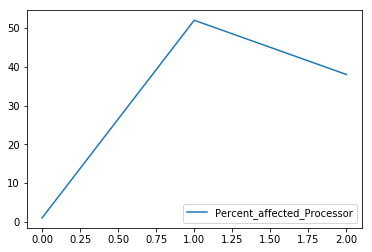

In [115]:
c.sort_index().plot()

In [116]:
df[cols[19]].unique()

[10.0.0.0, 6.3.0.0, 6.1.1.0, 10.0.1.44, 6.3.1.0, ..., 6.1.3.0, 10.0.8.0, 10.0.2.86, 10.0.23.0, 10.0.0.1]
Length: 36
Categories (36, object): [10.0.0.0, 6.3.0.0, 6.1.1.0, 10.0.1.44, ..., 10.0.8.0, 10.0.2.86, 10.0.23.0, 10.0.0.1]

In [117]:
d1=df[df.HasDetections==1].groupby(cols[19]).count()['MachineIdentifier'].reset_index()

d2=df[df.HasDetections==0].groupby(cols[19]).count()['MachineIdentifier'].reset_index()

d1.rename(columns={'MachineIdentifier':'NOM_affected_OsVer'},inplace=True)
d2.rename(columns={'MachineIdentifier':'NOM_unaffected_OsVer'},inplace=True)

d=d1.merge(d2,on=cols[19],how='outer')

d['Percent_affected_OsVer']=np.round(d['NOM_affected_OsVer']*100/(d['NOM_affected_OsVer']+d['NOM_unaffected_OsVer']))

d.drop(columns=['NOM_affected_OsVer','NOM_unaffected_OsVer'],inplace=True)

d.sort_values(by='Percent_affected_OsVer',ascending=False,inplace=True)

In [118]:
cols[20]

'OsBuild'

In [119]:
e1=df[df.HasDetections==1].groupby(cols[20]).count()['MachineIdentifier'].reset_index()

e2=df[df.HasDetections==0].groupby(cols[20]).count()['MachineIdentifier'].reset_index()

e1.rename(columns={'MachineIdentifier':'NOM_affected_OsBuild'},inplace=True)
e2.rename(columns={'MachineIdentifier':'NOM_unaffected_OsBuild'},inplace=True)

e=e1.merge(e2,on=cols[20],how='outer')

e['Percent_affected_OsBuild']=np.round(e['NOM_affected_OsBuild']*100/(e['NOM_affected_OsBuild']+e['NOM_unaffected_OsBuild']))

e.drop(columns=['NOM_affected_OsBuild','NOM_unaffected_OsBuild'],inplace=True)

e.sort_values(by='Percent_affected_OsBuild',ascending=False,inplace=True)

In [120]:
for temp in [t,u,v,w,z,a,b,c,d,e]:
    temp.iloc[:,1].fillna(0,inplace=True)

In [121]:
df.shape

(3219314, 74)

In [122]:
%%time
def expand_df(df):
    df=pd.get_dummies(data=df,columns=['RtpStateBitfield'])
    df=df.merge(t,on='EngineVersion',how='left')
    df=df.merge(u,on='AppVersion',how='left')
    df=df.merge(v,on='CountryIdentifier',how='left')
    df=df.merge(w,on='CityIdentifier',how='left')
    df=df.merge(z,on='OrganizationIdentifier',how='left')
    df=df.merge(a,on='GeoNameIdentifier',how='left')
    df=df.merge(b,on='Platform',how='left')
    df=df.merge(c,on='Processor',how='left')
    df=df.merge(d,on='OsVer',how='left')
    df=df.merge(e,on='OsBuild',how='left')
    return df

Wall time: 0 ns


In [123]:
temp1=df.AppVersion.str.split(".",expand=True,)

In [124]:
temp1.drop(columns=[0],inplace=True)

In [125]:
temp1.rename(columns={1:'AppVersion_1',2:'AppVersion_2',3:'AppVersion_3'},inplace=True)

In [126]:
df=df.merge(temp1,left_index=True,right_index=True)

In [127]:
temp1=df.EngineVersion.str.split(".",expand=True,)

In [128]:
temp1[3].value_counts()

1    2909166
2     105687
4      93973
3      54039
5      25268
6      15967
0      15214
Name: 3, dtype: int64

In [129]:
temp1.drop(columns=[0,1],inplace=True)

In [130]:
temp1.head()

,2,3
0,15100,1
1,14600,4
2,15100,1
3,15100,1
4,15100,1


In [131]:
temp1.rename(columns={2:'EngineVersion_2',3:'EngineVersion_3'},inplace=True)

In [132]:
df=df.merge(temp1,left_index=True,right_index=True)

In [133]:
df.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,AppVersion_1,AppVersion_2,AppVersion_3,EngineVersion_2,EngineVersion_3
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,10.0,0,18,1807,18075,15100,1
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,8.0,0,13,17134,1,14600,4
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,3.0,0,18,1807,18075,15100,1
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,3.0,1,18,1807,18075,15100,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,...,0,0.0,0.0,1.0,1,18,1807,18075,15100,1


In [134]:
temp1=df.AvSigVersion.str.split(".",expand=True,)

In [135]:
temp1[0].value_counts()

1    3219294
0         20
Name: 0, dtype: int64

In [136]:
temp1[3].value_counts()

0    3219314
Name: 3, dtype: int64

In [137]:
temp1.drop(columns=[0,3],inplace=True)

In [138]:
temp1.head()

,1,2
0,273,1735
1,263,48
2,273,1341
3,273,1527
4,273,1379


In [139]:
temp1.rename(columns={1:'AvSigVersion_1',2:'AvSigVersion_2'},inplace=True)

In [140]:
df=df.merge(temp1,left_index=True,right_index=True)

In [141]:
df.drop(columns=['EngineVersion','AppVersion','AvSigVersion'],inplace=True)

In [142]:
df.columns

Index(['MachineIdentifier', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'GeoNameIdentifier',
       'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode',
       'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPri

In [143]:
temp1=df.Census_OSVersion.str.split(".",expand=True,)

In [144]:
temp1[0].value_counts()

10    3219314
Name: 0, dtype: int64

In [145]:
temp1[1].value_counts()

0    3219314
Name: 1, dtype: int64

In [146]:
temp1.drop(columns=[0,1],inplace=True)

In [147]:
temp1.rename(columns={2:'Census_OSVersion_2',3:'Census_OSVersion_3'},inplace=True)

In [148]:
df=df.merge(temp1,left_index=True,right_index=True)

In [149]:
df[['Census_OSBuildRevision','Census_OSVersion_3']].corr()

,Census_OSBuildRevision
Census_OSBuildRevision,1.0


In [150]:
df.drop(columns=['Census_OSVersion_3'],inplace=True)

In [151]:
df[['OsBuild','Census_OSVersion_2']].corr()

,OsBuild
OsBuild,1.0


In [152]:
df.drop(columns=['Census_OSVersion','Census_OSVersion_2'],inplace=True)

In [153]:
df[['OsBuild','Census_OSBuildNumber']].corr()

,OsBuild,Census_OSBuildNumber
OsBuild,1.000000,0.949837
Census_OSBuildNumber,0.949837,1.000000


In [154]:
df.drop(columns=['Census_OSBuildNumber'],inplace=True)

In [155]:
numeric_cols=df.select_dtypes(include=['float16','float32','float64','int8','int16','int32']).columns.tolist()

In [156]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [157]:
df.shape

(3219314, 76)

In [158]:
temp1=df.AVProductStatesIdentifier.value_counts().reset_index()

temp1_list=temp1[temp1.AVProductStatesIdentifier>5000]['index'].tolist()

df['AVProductStatesIdentifier']=[1 if x in temp1_list else 0 for x in df['AVProductStatesIdentifier']]

In [161]:
df.AVProductStatesIdentifier.value_counts()

1    2897639
0     321675
Name: AVProductStatesIdentifier, dtype: int64

In [162]:
temp1=df.CountryIdentifier.value_counts().reset_index()

In [163]:
df=pd.get_dummies(data=df,columns=['CountryIdentifier'],dtype='int8')

In [164]:
df.OrganizationIdentifier.nunique()

47

In [165]:
df=pd.get_dummies(data=df,columns=['OrganizationIdentifier'],dtype='int8')

In [166]:
import gc

In [167]:
gc.collect()

137

In [168]:
temp1=df.OsVer.str.split(".",expand=True)

In [169]:
temp1.rename(columns={0:'OsVer_0',1:'OsVer_1',2:'OsVer_2',3:'OsVer_3'},inplace=True)

In [170]:
df=df.merge(temp1,left_index=True,right_index=True)

In [171]:
df.Census_DeviceFamily.value_counts()

Windows.Desktop    3219311
Windows.Server           3
Windows                  0
Name: Census_DeviceFamily, dtype: int64

In [172]:
df.drop(columns='Census_DeviceFamily',inplace=True)

In [173]:
df.Census_FlightRing.value_counts()

Retail      3030932
NOT_SET       96788
Unknown       78999
WIS            3878
RP             3707
WIF            3674
Disabled       1332
OSG               3
Canary            1
Name: Census_FlightRing, dtype: int64

In [174]:
df=pd.get_dummies(data=df,columns=['Census_FlightRing'],dtype='int8')

In [175]:
df.Census_GenuineStateName.value_counts()

IS_GENUINE         2907475
INVALID_LICENSE     265120
OFFLINE              43730
UNKNOWN               2989
Name: Census_GenuineStateName, dtype: int64

In [176]:
df.select_dtypes(include='int64').columns

Index(['AVProductStatesIdentifier'], dtype='object')

In [177]:
df['AVProductStatesIdentifier']=df.AVProductStatesIdentifier.astype('int8')

In [178]:
df.select_dtypes(include='int64').columns

Index([], dtype='object')

In [179]:
%%time
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('int32')

Wall time: 10.9 s


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3219314 entries, 0 to 3999999
Columns: 354 entries, MachineIdentifier to Census_FlightRing_Canary
dtypes: category(20), float16(22), float32(8), int32(16), int8(288)
memory usage: 1.6 GB


In [181]:
df.select_dtypes(include='float32').columns

Index(['CityIdentifier', 'UacLuaenable', 'Census_OEMModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_InternalBatteryNumberOfCharges',
       'Census_FirmwareVersionIdentifier'],
      dtype='object')

In [182]:
df.select_dtypes(include='float16').columns

Index(['RtpStateBitfield', 'AVProductsInstalled', 'AVProductsEnabled',
       'GeoNameIdentifier', 'IsProtected', 'SMode', 'IeVerIdentifier',
       'Firewall', 'Census_OEMNameIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_OSInstallLanguageIdentifier', 'Census_IsFlightsDisabled',
       'Census_FirmwareManufacturerIdentifier', 'Census_IsVirtualDevice',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier'],
      dtype='object')

In [183]:
df['Firewall']=df.Firewall.astype('int8')

In [184]:
df['Census_ProcessorCoreCount']=df.Census_ProcessorCoreCount.astype('int8')

In [185]:
df['Census_ProcessorManufacturerIdentifier']=df.Census_ProcessorManufacturerIdentifier.astype('int8')

In [186]:
df['Census_OSInstallLanguageIdentifier']=df.Census_OSInstallLanguageIdentifier.astype('int8')

In [187]:
df['Census_IsFlightsDisabled']=df.Census_IsFlightsDisabled.astype('int8')

In [188]:
df['Census_IsVirtualDevice']=df.Census_IsVirtualDevice.astype('int8')

In [189]:
df['Census_IsAlwaysOnAlwaysConnectedCapable']=df.Census_IsAlwaysOnAlwaysConnectedCapable.astype('int8')

In [190]:
df['Wdft_IsGamer']=df.Wdft_IsGamer.astype('int8')

In [191]:
df['Wdft_RegionIdentifier']=df.Wdft_RegionIdentifier.astype('int8')

In [192]:
df['RtpStateBitfield']=df.RtpStateBitfield.astype('int8')

In [193]:
df['AVProductsInstalled']=df.AVProductsInstalled.astype('int8')

In [194]:
df['AVProductsEnabled']=df.AVProductsEnabled.astype('int8')

In [195]:
df['IsProtected']=df.IsProtected.astype('int8')

In [196]:
df['SMode']=df.SMode.astype('int8')

In [197]:
df.UacLuaenable.value_counts()

1.0           3204889
0.0             14319
48.0               75
2.0                12
49.0                8
3.0                 5
6357062.0           4
16777216.0          1
5.0                 1
Name: UacLuaenable, dtype: int64

In [198]:
df.Census_PowerPlatformRoleName.value_counts()

Mobile               2263264
Desktop               724256
Slate                 182524
Workstation            32164
SOHOServer             12710
UNKNOWN                 2017
AppliancePC             1478
EnterpriseServer         878
PerformanceServer         23
Unspecified                0
Name: Census_PowerPlatformRoleName, dtype: int64

In [199]:
df.Census_IsFlightsDisabled.value_counts()

0    3219282
1         32
Name: Census_IsFlightsDisabled, dtype: int64

In [200]:
df.drop(columns=['Census_IsFlightsDisabled'],inplace=True)

In [201]:
df.Census_IsVirtualDevice.value_counts()

0    3209504
1       9810
Name: Census_IsVirtualDevice, dtype: int64

In [202]:
df[df.Census_IsVirtualDevice==0]['HasDetections'].value_counts()

1    1629872
0    1579632
Name: HasDetections, dtype: int64

In [203]:
df.Census_IsTouchEnabled.value_counts()

0    2796535
1     422779
Name: Census_IsTouchEnabled, dtype: int64

In [204]:
df[df.Census_IsTouchEnabled==0]['HasDetections'].value_counts()

1    1440593
0    1355942
Name: HasDetections, dtype: int64

In [205]:
df[df.Census_IsPenCapable==0]['HasDetections'].value_counts()

1    1571739
0    1517320
Name: HasDetections, dtype: int64

In [206]:
df[df.Census_IsAlwaysOnAlwaysConnectedCapable==1]['HasDetections'].value_counts()

0    117711
1     70802
Name: HasDetections, dtype: int64

In [207]:
df.shape

(3219314, 353)

In [208]:
df=pd.get_dummies(data=df,columns=['Wdft_RegionIdentifier'],dtype='int8')

In [209]:
df['Census_IsSecureBootEnabled']=df.Census_IsSecureBootEnabled.astype('int8')

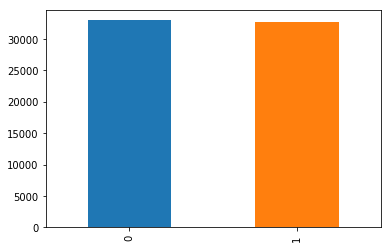

In [210]:
df[df.Firewall==0]['HasDetections'].value_counts().plot(kind='bar')

In [211]:
df[(df.AVProductsEnabled==0)&(df.Firewall==0)&(df.AVProductsInstalled==1)]['HasDetections'].value_counts()

1    122
0    105
Name: HasDetections, dtype: int64

In [212]:
df['AVProductsInstalled_dummy']=[1 if x==1 else 0 for x in df.AVProductsInstalled]

In [213]:
df.select_dtypes(include='category').columns

Index(['MachineIdentifier', 'Platform', 'Processor', 'OsVer',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen',
       'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName',
       'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
       'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel'],
      dtype='object')

In [214]:
temp1=df.OsBuildLab.str.split(".",expand=True)

In [215]:
#OsBuild
temp1[2].value_counts()

amd64fre    2941594
x86fre       277582
arm64fre        138
Name: 2, dtype: int64

In [216]:
df.Processor.value_counts()

x64      2941594
x86       277582
arm64        138
Name: Processor, dtype: int64

In [217]:
temp1.drop(columns=[2],inplace=True)

In [218]:
temp1.rename(columns={0:'OsBuildLab_0',1:'OsBuildLab_1',3:'OsBuildLab_3',4:'OsBuildLab_4'},inplace=True)

In [219]:
df=df.merge(temp1,left_index=True,right_index=True)

In [220]:
df[['OsBuildLab_0','OsBuild']].corr()

,OsBuild
OsBuild,1.0


In [221]:
df.drop(columns=['OsBuildLab_0'],inplace=True)

In [222]:
df.Census_MDC2FormFactor.value_counts()

Notebook        2089858
Desktop          684076
Convertible      156611
Detachable       116090
AllInOne          99475
PCOther           37827
LargeTablet       23421
SmallTablet       11379
SmallServer         399
MediumServer        177
LargeServer           1
ServerOther           0
Name: Census_MDC2FormFactor, dtype: int64

In [223]:
df.select_dtypes(include='object').columns

Index(['OsBuildLab_1', 'OsBuildLab_3', 'OsBuildLab_4'], dtype='object')

In [224]:
%%time
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('category')

Wall time: 1.18 s


In [225]:
df['OsBuildLab_1']=df['OsBuildLab_1'].astype('int32')

In [226]:
categorical_cols=df.select_dtypes(include='category').columns

In [227]:
categorical_cols=categorical_cols[1:]

In [228]:
#temp_dict={}
#number_of_unique={}
#equal_col=[]
#for col in df.columns:
#    if col=='MachineIdentifier':
#        continue
#    elif col in categorical_cols:
#        temp_dict[col]=statistics.mode(df[col])
#        number_of_unique[col]=df[col].nunique()
#    else:
#        temp_dict[col]=np.nanmedian(df[col])

In [229]:
%%time
le={}
for col in categorical_cols:
    le[col]=LabelEncoder()
    df[col]=le[col].fit_transform(df[col])

Wall time: 1min 11s


In [230]:
df.shape

(3219314, 371)

In [231]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_curve,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

In [232]:
l=[]
for col in df.columns:
    if col=='HasDetections':
        continue
    else:
        l.append(col)
l=l+list(['HasDetections'])

df=df[l]

In [233]:
df.shape

(3219314, 371)

In [234]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [235]:
import gc

In [238]:
gc.collect()

0

In [239]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [240]:
#clf1=LogisticRegression(class_weight='balanced',fit_intercept=True,random_state=42,verbose=True)
#clf1=LGBMClassifier(learning_rate=0.1,n_estimators=50,random_state=42,silent=False)

In [241]:
clf=XGBClassifier(learning_rate=0.1,n_estimators=70,random_state=42,reg_alpha=0.2,reg_lambda=0.4,silent=False)

In [242]:
%%time
clf.fit(X_train,y_train)

[21:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[21:59:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:01:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:02:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:04:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:05:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:07:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:02:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:03:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:04:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:05:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:06:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:07:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:08:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=70,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0.2, reg_lambda=0.4, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [243]:
#vc=VotingClassifier(estimators=[('gnb',clf2),('abc',clf3),('gb',clf4)],voting='soft',weights=[2,6,2])

In [244]:
predictions=clf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [245]:
%%time
prediction_scores=clf.predict_proba(X_test)

Wall time: 10.5 s


In [246]:
%%time
scores=[]
for score in prediction_scores:
    scores.append(score[1])

Wall time: 535 ms


In [247]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.6347872140501939
Precision :  0.6359306494830305
Recall :  0.6537657801201128
ROC AUC score :  0.6927587748203158
Confusion Matrix : 
 [[195353 122150]
 [112997 213363]]


In [248]:
#from sklearn.preprocessing import PolynomialFeatures

In [249]:
#p=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False).fit(X1)

In [250]:
#X1=pd.DataFrame(data=p.transform(X1),columns=p.get_feature_names(X1.columns))

In [251]:
import gc

In [252]:
gc.collect()

0

In [253]:
gc.collect()

0

In [254]:
len(clf.feature_importances_[clf.feature_importances_>0])

58

In [255]:
important_columns=X.columns[np.argsort(clf.feature_importances_)[-100:]]

In [256]:
X=X[important_columns]

In [257]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [260]:
clf=XGBClassifier(learning_rate=0.1,n_estimators=150,random_state=42,reg_alpha=0.3,reg_lambda=0.4,silent=False,max_depth=4)

In [261]:
%%time
clf.fit(X_train,y_train)

[23:49:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:49:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:49:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:49:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:50:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:50:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:50:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:58:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:58:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:59:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:59:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:59:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:59:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[23:59:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[00:08:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:08:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:08:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:08:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:08:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:08:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[00:09:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0.3, reg_lambda=0.4, scale_pos_weight=1,
       seed=None, silent=False, subsample=1)

In [262]:
predictions=clf.predict(X_test)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [263]:
prediction_scores=clf.predict_proba(X_test)

In [264]:
%%time
scores=[]
for score in prediction_scores:
    scores.append(score[1])

Wall time: 279 ms


In [265]:
print("Accuracy Score : ",accuracy_score(y_test,predictions))
print("Precision : ",precision_score(y_test,predictions))
print("Recall : ",recall_score(y_test,predictions))
print("ROC AUC score : ",roc_auc_score(y_test,scores))
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))

Accuracy Score :  0.6454432076388921
Precision :  0.650910008555373
Recall :  0.6480818727785268
ROC AUC score :  0.7061687133317458
Confusion Matrix : 
 [[204069 113434]
 [114852 211508]]


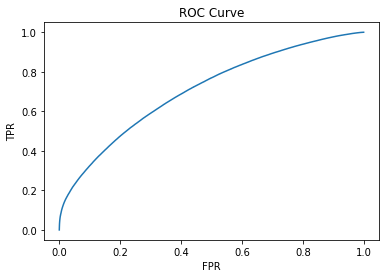

In [266]:
plt.plot(roc_curve(y_test,scores)[0],roc_curve(y_test,scores)[1])
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [267]:
from sklearn.metrics import roc_auc_score,roc_curve

In [270]:
gc.collect()

0

In [271]:
#Releasing memory
del df
gc.collect()
df=pd.DataFrame()

In [272]:
%%time
df_test=pd.read_csv("test.csv",dtype={'MachineIdentifier': 'category',
 'ProductName': 'category',
 'EngineVersion': 'category',
 'AppVersion': 'category',
 'AvSigVersion': 'category',
 'Platform': 'category',
 'Processor': 'category',
 'OsVer': 'category',
 'OsPlatformSubRelease': 'category',
 'OsBuildLab': 'category',
 'SkuEdition': 'category',
 'PuaMode': 'category',
 'SmartScreen': 'category',
 'Census_MDC2FormFactor': 'category',
 'Census_DeviceFamily': 'category',
 'Census_ProcessorClass': 'category',
 'Census_PrimaryDiskTypeName': 'category',
 'Census_ChassisTypeName': 'category',
 'Census_PowerPlatformRoleName': 'category',
 'Census_InternalBatteryType': 'category',
 'Census_OSVersion': 'category',
 'Census_OSArchitecture': 'category',
 'Census_OSBranch': 'category',
 'Census_OSEdition': 'category',
 'Census_OSSkuName': 'category',
 'Census_OSInstallTypeName': 'category',
 'Census_OSWUAutoUpdateOptionsName': 'category',
 'Census_GenuineStateName': 'category',
 'Census_ActivationChannel': 'category',
 'Census_FlightRing': 'category',
 'RtpStateBitfield': 'float16',
 'DefaultBrowsersIdentifier': 'float16',
 'AVProductsInstalled': 'float16',
 'AVProductsEnabled': 'float16',
 'OrganizationIdentifier': 'float16',
 'GeoNameIdentifier': 'float16',
 'IsProtected': 'float16',
 'SMode': 'float16',
 'IeVerIdentifier': 'float16',
 'Firewall': 'float16',
 'Census_OEMNameIdentifier': 'float16',
 'Census_ProcessorCoreCount': 'float16',
 'Census_ProcessorManufacturerIdentifier': 'float16',
 'Census_ProcessorModelIdentifier': 'float16',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float16',
 'Census_InternalPrimaryDisplayResolutionHorizontal': 'float16',
 'Census_InternalPrimaryDisplayResolutionVertical': 'float16',
 'Census_OSInstallLanguageIdentifier': 'float16',
 'Census_IsFlightingInternal': 'float16',
 'Census_IsFlightsDisabled': 'float16',
 'Census_ThresholdOptIn': 'float16',
 'Census_FirmwareManufacturerIdentifier': 'float16',
 'Census_IsWIMBootEnabled': 'float16',
 'Census_IsVirtualDevice': 'float16',
 'Census_IsAlwaysOnAlwaysConnectedCapable': 'float16',
 'Wdft_IsGamer': 'float16',
 'Wdft_RegionIdentifier': 'float16',
 'AVProductStatesIdentifier': 'float32',
 'CityIdentifier': 'float32',
 'UacLuaenable': 'float32',
 'Census_OEMModelIdentifier': 'float32',
 'Census_PrimaryDiskTotalCapacity': 'float32',
 'Census_SystemVolumeTotalCapacity': 'float32',
 'Census_TotalPhysicalRAM': 'float32',
 'Census_InternalBatteryNumberOfCharges': 'float32',
 'Census_FirmwareVersionIdentifier': 'float32',
 'IsBeta': 'int32',
 'IsSxsPassiveMode': 'int32',
 'HasTpm': 'int32',
 'CountryIdentifier': 'int32',
 'LocaleEnglishNameIdentifier': 'int32',
 'OsBuild': 'int32',
 'OsSuite': 'int32',
 'AutoSampleOptIn': 'int32',
 'Census_HasOpticalDiskDrive': 'int32',
 'Census_OSBuildNumber': 'int32',
 'Census_OSBuildRevision': 'int32',
 'Census_OSUILocaleIdentifier': 'int32',
 'Census_IsPortableOperatingSystem': 'int32',
 'Census_IsSecureBootEnabled': 'int32',
 'Census_IsTouchEnabled': 'int32',
 'Census_IsPenCapable': 'int32'})

Wall time: 2min 25s


In [273]:
solution=pd.DataFrame(data=df_test['MachineIdentifier'],columns=['MachineIdentifier'])

In [275]:
X.columns

Index(['CountryIdentifier_86', 'CountryIdentifier_85', 'CountryIdentifier_84',
       'CountryIdentifier_83', 'CountryIdentifier_82', 'CountryIdentifier_63',
       'CountryIdentifier_62', 'CountryIdentifier_66', 'CountryIdentifier_61',
       'CountryIdentifier_47', 'CountryIdentifier_46', 'CountryIdentifier_44',
       'CountryIdentifier_43', 'CountryIdentifier_42', 'CountryIdentifier_41',
       'CountryIdentifier_40', 'CountryIdentifier_39', 'CountryIdentifier_48',
       'CountryIdentifier_38', 'CountryIdentifier_36', 'CountryIdentifier_35',
       'CountryIdentifier_34', 'CountryIdentifier_33', 'CountryIdentifier_32',
       'CountryIdentifier_31', 'CountryIdentifier_30', 'CountryIdentifier_29',
       'CountryIdentifier_37', 'CountryIdentifier_49', 'CountryIdentifier_45',
       'CountryIdentifier_58', 'CountryIdentifier_60', 'CountryIdentifier_59',
       'CountryIdentifier_50', 'CountryIdentifier_57', 'CountryIdentifier_56',
       'CountryIdentifier_55', 'CountryIdentifier_54

In [336]:
#col_list=['SmartScreen','OrganizationIdentifier','CountryIdentifier','Wdft_RegionIdentifier','Census_IsAlwaysOnAlwaysConnectedCapable','Census_OEMModelIdentifier','Census_IsSecureBootEnabled','IsSxsPassiveMode','IeVerIdentifier','Census_FlightRing','SMode','Census_InternalBatteryNumberOfCharges','Census_PrimaryDiskTypeName','Census_GenuineStateName','Census_IsTouchEnabled','Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier','Census_OSInstallTypeName', 'IsProtected','Census_ProcessorCoreCount', 'Census_OSUILocaleIdentifier', 'Processor','LocaleEnglishNameIdentifier', 'Census_IsVirtualDevice','Census_OSWUAutoUpdateOptionsName','Census_SystemVolumeTotalCapacity', 'AVProductsEnabled','Census_HasOpticalDiskDrive', 'AVProductStatesIdentifier','OsPlatformSubRelease','Census_InternalPrimaryDisplayResolutionHorizontal', 'OsSuite','OsBuild', 'Census_InternalPrimaryDisplayResolutionVertical','Census_OSBuildRevision','Census_ChassisTypeName','CityIdentifier', 'Census_FirmwareVersionIdentifier', 'OsBuildLab']

In [276]:
col_list=['OrganizationIdentifier', 'CountryIdentifier','Census_ChassisTypeName','Census_FlightRing','Census_GenuineStateName',
'Census_IsAlwaysOnAlwaysConnectedCapable','Census_OEMModelIdentifier','OsPlatformSubRelease','Census_FirmwareVersionIdentifier',
'AVProductsEnabled', 'SMode','OsBuildLab','Wdft_RegionIdentifier','CityIdentifier','Census_IsSecureBootEnabled','OsSuite', 'IeVerIdentifier',
'IsSxsPassiveMode','Census_SystemVolumeTotalCapacity', 'Census_PrimaryDiskTypeName','Census_InternalBatteryNumberOfCharges', 'Census_IsTouchEnabled',
'Census_HasOpticalDiskDrive', 'Census_OSWUAutoUpdateOptionsName','AVProductStatesIdentifier','Census_OSInstallLanguageIdentifier', 'OsBuild',
'Census_OSBuildRevision', 'Census_ProcessorCoreCount','Census_InternalPrimaryDisplayResolutionHorizontal','Census_OSUILocaleIdentifier',
'Census_InternalPrimaryDisplayResolutionVertical','LocaleEnglishNameIdentifier', 'Processor','Census_IsVirtualDevice','Census_ProcessorModelIdentifier', 'Census_OSInstallTypeName',
'IsProtected','Census_ActivationChannel','Wdft_IsGamer', 'Census_PrimaryDiskTotalCapacity','Census_TotalPhysicalRAM','RtpStateBitfield',
'Census_InternalPrimaryDiagonalDisplaySizeInInches','AVProductsInstalled','SmartScreen','EngineVersion','AppVersion','AvSigVersion']

In [277]:
len(col_list)

49

In [278]:
f=[]
for col in col_list:
    if col not in X.columns:
        f.append(col)
    else:
        continue

In [279]:
df_test.shape

(7853253, 82)

In [280]:
df_test.memory_usage().sum()

1890966598

In [282]:
f

['OrganizationIdentifier',
 'CountryIdentifier',
 'Census_FlightRing',
 'Wdft_RegionIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion']

In [283]:
d=[]
for col in df_test.columns:
    if col in col_list:
        continue
    else:
        d.append(col)

In [284]:
df_test.drop(columns=d,inplace=True)

In [285]:
null_cols=df_test.columns[df_test.isnull().any()]

In [286]:
null_cols

Index(['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'CityIdentifier', 'OrganizationIdentifier',
       'OsBuildLab', 'IsProtected', 'SMode', 'IeVerIdentifier', 'SmartScreen',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM', 'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges',
       'Census_OSInstallLanguageIdentifier', 'Census_GenuineStateName',
       'Census_FirmwareVersionIdentifier', 'Census_IsVirtualDevice',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer',
       'Wdft_RegionIdentifier'],
      dtype='object')

In [288]:
#f=[]
for col in null_cols:
    #if col in X.columns:
    df_test[col].fillna(column_value_replacements[col],inplace=True)
    #else:
    #    f.append(col)

In [289]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [290]:
set(X.columns)-set(df_test.columns)

{'AppVersion_2',
 'AppVersion_3',
 'AvSigVersion_1',
 'AvSigVersion_2',
 'Census_FlightRing_Unknown',
 'CountryIdentifier_171',
 'CountryIdentifier_207',
 'CountryIdentifier_214',
 'CountryIdentifier_29',
 'CountryIdentifier_30',
 'CountryIdentifier_31',
 'CountryIdentifier_32',
 'CountryIdentifier_33',
 'CountryIdentifier_34',
 'CountryIdentifier_35',
 'CountryIdentifier_36',
 'CountryIdentifier_37',
 'CountryIdentifier_38',
 'CountryIdentifier_39',
 'CountryIdentifier_40',
 'CountryIdentifier_41',
 'CountryIdentifier_42',
 'CountryIdentifier_43',
 'CountryIdentifier_44',
 'CountryIdentifier_45',
 'CountryIdentifier_46',
 'CountryIdentifier_47',
 'CountryIdentifier_48',
 'CountryIdentifier_49',
 'CountryIdentifier_50',
 'CountryIdentifier_51',
 'CountryIdentifier_52',
 'CountryIdentifier_53',
 'CountryIdentifier_54',
 'CountryIdentifier_55',
 'CountryIdentifier_56',
 'CountryIdentifier_57',
 'CountryIdentifier_58',
 'CountryIdentifier_59',
 'CountryIdentifier_60',
 'CountryIdentifier_

In [291]:
df_test['Wdft_RegionIdentifier']=df_test['Wdft_RegionIdentifier'].astype('int32')

In [292]:
temp1=df_test.OsBuildLab.str.split(".",expand=True,)

In [293]:
temp1.drop(columns=[0,2],inplace=True)

In [294]:
temp1.rename(columns={1:'OsBuildLab_1',3:'OsBuildLab_3',4:'OsBuildLab_4'},inplace=True)

In [295]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [296]:
df_test.columns

Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'RtpStateBitfield',
       'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier',
       'OrganizationIdentifier', 'LocaleEnglishNameIdentifier', 'Processor',
       'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab',
       'IsProtected', 'SMode', 'IeVerIdentifier', 'SmartScreen',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity',
       'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildRevision',
       

In [297]:
temp1=df_test.AppVersion.str.split(".",expand=True,)

In [299]:
temp1.drop(columns=[0,1],inplace=True)

In [300]:
temp1.rename(columns={2:'AppVersion_2',3:'AppVersion_3'},inplace=True)

In [301]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [303]:
temp1=df_test.AvSigVersion.str.split(".",expand=True,)

In [304]:
temp1.head()

,0,1,2,3
0,1,281,501,0
1,1,279,301,0
2,1,277,230,0
3,1,281,664,0
4,1,279,236,0


In [305]:
temp1.drop(columns=[0,3],inplace=True)

In [306]:
temp1.rename(columns={1:'AvSigVersion_1',2:'AvSigVersion_2'},inplace=True)

In [307]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [308]:
temp1=df_test.EngineVersion.str.split(".",expand=True,)

In [310]:
temp1.drop(columns=[0,1,3],inplace=True)

In [312]:
temp1.rename(columns={2:'EngineVersion_2'},inplace=True)

In [313]:
df_test=df_test.merge(temp1,left_index=True,right_index=True)

In [317]:
%%time
df_test=pd.get_dummies(data=df_test,columns=['CountryIdentifier','OrganizationIdentifier','Wdft_RegionIdentifier','Census_FlightRing'])

Wall time: 26.8 s


In [319]:
df_test.shape

(7853253, 351)

In [320]:
set(X.columns)-set(df_test.columns)

set()

In [321]:
d=[]
for col in df_test.columns:
    if col in X.columns:
        continue
    else:
        d.append(col)

In [323]:
%%time
df_test.drop(columns=d,inplace=True)

Wall time: 5.38 s


In [325]:
print("Shape of Training Data : ",X.shape)
print("Shape of test data : ",df_test.shape)

Shape of Training Data :  (3219314, 100)
Shape of test data :  (7853253, 100)


In [326]:
df_test.select_dtypes(include=['category','object']).columns

Index(['Processor', 'OsPlatformSubRelease', 'OsBuildLab', 'SmartScreen',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName',
       'Census_GenuineStateName', 'Census_ActivationChannel', 'OsBuildLab_1',
       'OsBuildLab_3', 'OsBuildLab_4', 'AppVersion_2', 'AppVersion_3',
       'AvSigVersion_1', 'AvSigVersion_2', 'EngineVersion_2'],
      dtype='object')

In [327]:
df_test[df_test['OsBuildLab_1']=='1*amd64fre']

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CityIdentifier,LocaleEnglishNameIdentifier,Processor,OsBuild,OsSuite,...,CountryIdentifier_86,CountryIdentifier_89,CountryIdentifier_171,CountryIdentifier_207,CountryIdentifier_214,OrganizationIdentifier_51.0,Wdft_RegionIdentifier_7,Wdft_RegionIdentifier_10,Wdft_RegionIdentifier_15,Census_FlightRing_Unknown
6529507,7.0,0,53447.0,1.0,1.0,937.0,58,x64,17134,256,...,0,0,0,0,0,0,0,0,0,0


In [328]:
df_test.isnull().sum().sort_values(ascending=False)

OsBuildLab_4                                         1
Census_FlightRing_Unknown                            0
Census_FirmwareVersionIdentifier                     0
Census_InternalPrimaryDisplayResolutionHorizontal    0
Census_InternalPrimaryDisplayResolutionVertical      0
Census_InternalBatteryNumberOfCharges                0
Census_OSBuildRevision                               0
Census_OSInstallTypeName                             0
Census_OSInstallLanguageIdentifier                   0
Census_OSUILocaleIdentifier                          0
Census_OSWUAutoUpdateOptionsName                     0
Census_GenuineStateName                              0
Census_ActivationChannel                             0
Census_IsSecureBootEnabled                           0
Wdft_RegionIdentifier_15                             0
Census_IsVirtualDevice                               0
Census_IsTouchEnabled                                0
Census_IsAlwaysOnAlwaysConnectedCapable              0
Wdft_IsGam

In [329]:
%%time
for i in range(0,len(df_test)):
    if df_test.loc[i,'OsBuildLab_1']=='1*amd64fre':
        df_test.loc[i,'OsBuildLab_1']=1
        break
    else:
        continue

Wall time: 2min 10s


In [330]:
df_test['OsBuildLab_1']=df_test['OsBuildLab_1'].astype('int32')

In [331]:
df_test.OsBuildLab_4.fillna(le['OsBuildLab_4'].inverse_transform(statistics.mode(X['OsBuildLab_4'])),inplace=True)

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [342]:
%%time
for col in df_test.select_dtypes(include=['category','object']).columns:
    if col in le.keys():
        continue
    else:
        df_test[col]=df_test[col].astype('int32')

Wall time: 5.21 s


In [345]:
df_test.select_dtypes(include=['category','object']).columns

Index(['Processor', 'OsPlatformSubRelease', 'OsBuildLab', 'SmartScreen',
       'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
       'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName',
       'Census_GenuineStateName', 'Census_ActivationChannel', 'OsBuildLab_3',
       'OsBuildLab_4'],
      dtype='object')

In [346]:
for col in df_test.select_dtypes(include=['category','object']).columns:
    if col in le.keys():
        try:
            df_test[col]=le[col].fit_transform(df_test[col])
        except:
            print("Exception : ",col)
    else:
        print(col)

In [347]:
df_test['OsBuildLab_4'].head(2)

0    163
1    270
Name: OsBuildLab_4, dtype: int64

In [352]:
#df_test['OsBuildLab_4']=le['OsBuildLab_4'].fit_transform(df_test['OsBuildLab_4'])

In [354]:
df_test[X.columns].head()

,CountryIdentifier_86,CountryIdentifier_85,CountryIdentifier_84,CountryIdentifier_83,CountryIdentifier_82,CountryIdentifier_63,CountryIdentifier_62,CountryIdentifier_66,CountryIdentifier_61,CountryIdentifier_47,...,Census_PrimaryDiskTotalCapacity,Census_TotalPhysicalRAM,AppVersion_3,AvSigVersion_2,RtpStateBitfield,AppVersion_2,Census_InternalPrimaryDiagonalDisplaySizeInInches,AvSigVersion_1,AVProductsInstalled,SmartScreen
0,0,0,0,0,0,0,0,0,0,0,...,488386.0,8192.0,5,501,7.0,1810,15.500000,281,1.0,13
1,0,0,0,0,0,0,0,0,0,0,...,1907729.0,8192.0,2,301,7.0,1809,15.500000,279,1.0,13
2,0,0,0,0,0,0,0,0,0,0,...,29820.0,4096.0,2,230,7.0,1809,13.898438,277,2.0,13
3,0,0,0,0,0,0,0,0,0,0,...,476940.0,4096.0,5,664,7.0,1810,14.000000,281,2.0,13
4,0,0,0,0,0,0,0,0,0,0,...,476940.0,2048.0,2,236,7.0,1809,15.500000,279,1.0,13


In [359]:
temp1=X.AVProductStatesIdentifier.value_counts().reset_index()

temp1_list=temp1[temp1.AVProductStatesIdentifier>5000]['index'].tolist()

#df['AVProductStatesIdentifier']=[1 if x in temp1_list else 0 for x in df['AVProductStatesIdentifier']]

In [366]:
#Rectify AVProductStatesIdentifier feature engineering in training data.
df_test['AVProductStatesIdentifier']=[1 if x in temp1_list else 0 for x in df_test['AVProductStatesIdentifier']]

In [363]:
#df_test.drop(columns=['AVProductStatesIdentifier_dummy'],inplace=True)

In [384]:
gc.collect()

0

In [377]:
for col in df_test.columns:
    if df_test[col].nunique()==2:
        df_test[col]=df_test[col].astype('int8')
    else:
        print(col)
        continue

RtpStateBitfield
AVProductStatesIdentifier
AVProductsInstalled
AVProductsEnabled
CityIdentifier
LocaleEnglishNameIdentifier
Processor
OsBuild
OsSuite
OsPlatformSubRelease
OsBuildLab
IeVerIdentifier
SmartScreen
Census_OEMModelIdentifier
Census_ProcessorCoreCount
Census_ProcessorModelIdentifier
Census_PrimaryDiskTotalCapacity
Census_PrimaryDiskTypeName
Census_SystemVolumeTotalCapacity
Census_TotalPhysicalRAM
Census_ChassisTypeName
Census_InternalPrimaryDiagonalDisplaySizeInInches
Census_InternalPrimaryDisplayResolutionHorizontal
Census_InternalPrimaryDisplayResolutionVertical
Census_InternalBatteryNumberOfCharges
Census_OSBuildRevision
Census_OSInstallTypeName
Census_OSInstallLanguageIdentifier
Census_OSUILocaleIdentifier
Census_OSWUAutoUpdateOptionsName
Census_GenuineStateName
Census_ActivationChannel
Census_FirmwareVersionIdentifier
OsBuildLab_1
OsBuildLab_3
OsBuildLab_4
AppVersion_2
AppVersion_3
AvSigVersion_1
AvSigVersion_2
EngineVersion_2


In [385]:
#Releasing memory
del [t,u,v,w,z,a,b,c,d,e]
gc.collect()
t=pd.DataFrame()
u=pd.DataFrame()
v=pd.DataFrame()
w=pd.DataFrame()
z=pd.DataFrame()
a=pd.DataFrame()
b=pd.DataFrame()
c=pd.DataFrame()
d=pd.DataFrame()
e=pd.DataFrame()

In [387]:
gc.collect()

0

array([[7., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 1., 0., 0.]])

In [395]:
%%time
final_predictions_scores=clf.predict_proba(df_test[X.columns])

MemoryError: 

In [408]:
scores=[]
for score in final_predictions_scores:
    scores.append(score[1])

In [409]:
scores

[0.5475711,
 0.4981573,
 0.4972552,
 0.48454648,
 0.5603435,
 0.49264532,
 0.53398114,
 0.35467917,
 0.48592517,
 0.4539983,
 0.5710186,
 0.43749806,
 0.5520055,
 0.6815022,
 0.47895175,
 0.554269,
 0.58629984,
 0.53492856,
 0.56378055,
 0.49835852,
 0.443027,
 0.51818424,
 0.5394709,
 0.51013637,
 0.51416373,
 0.56766236,
 0.5668039,
 0.3861724,
 0.42012313,
 0.5610944,
 0.52976745,
 0.5080568,
 0.5184186,
 0.53770125,
 0.501816,
 0.53625125,
 0.54808336,
 0.5353747,
 0.5152937,
 0.19749905,
 0.47328338,
 0.49859402,
 0.45856813,
 0.4671487,
 0.51992965,
 0.38804615,
 0.44505072,
 0.5672165,
 0.4988023,
 0.45240873,
 0.5580543,
 0.55398357,
 0.50560534,
 0.5223447,
 0.4744181,
 0.4992491,
 0.31012878,
 0.5439581,
 0.56122917,
 0.49175772,
 0.5729203,
 0.43800703,
 0.546316,
 0.45741346,
 0.36775932,
 0.5246965,
 0.48885772,
 0.3150565,
 0.5696967,
 0.5199619,
 0.5523198,
 0.33364156,
 0.46942532,
 0.5518357,
 0.51998144,
 0.5994731,
 0.5499743,
 0.48502582,
 0.4745687,
 0.29537773,
 0

In [410]:
solution['HasDetections']=scores

In [411]:
solution.to_csv("EDA_v3_FE_V5_solution10.csv",index=False)

In [223]:
gc.collect()

0

In [224]:
from sklearn.naive_bayes import GaussianNB

In [225]:
gnb=GaussianNB()